 ## Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

## Step 2: Loading the dataset

In [30]:
data = pd.read_csv(r'D:\castrone project\project data.csv')


In [31]:
data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [32]:
data.shape

(381109, 12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [34]:
data.columns.values

array(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype=object)

In [35]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
encoder = LabelEncoder()
data['Vehicle_Damage_encoded'] = encoder.fit_transform(data['Vehicle_Damage'])
print(data)



            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [37]:
data['Vehicle_Damage'].replace(to_replace='Yes', value=1, inplace=True)
data['Vehicle_Damage'].replace(to_replace='No',  value=0, inplace=True)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0


In [38]:
data['Vehicle_Age'].replace(to_replace='< 1 Year', value=1, inplace=True)
data['Vehicle_Age'].replace(to_replace='> 2 Years',  value=2, inplace=True)
data['Vehicle_Age'].replace(to_replace='1-2 Year',  value=1,inplace=True)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded
0,1,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,2,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0,0
2,3,Male,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,4,Male,21,1,11.0,1,1,0,28619.0,152.0,203,0,0
4,5,Female,29,1,41.0,1,1,0,27496.0,152.0,39,0,0


In [39]:
data['Gender'].replace(to_replace='Male', value=1, inplace=True)
data['Gender'].replace(to_replace='Female',  value=0, inplace=True)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,0


# Step 4: Data Exploration 

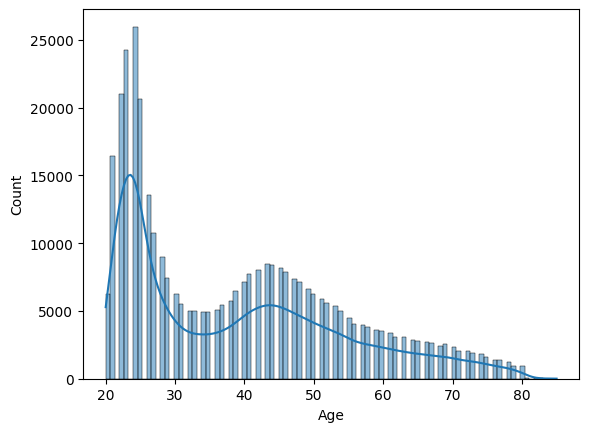

In [40]:
# Example: Visualize distributions
sns.histplot(data['Age'], kde=True)
plt.show()

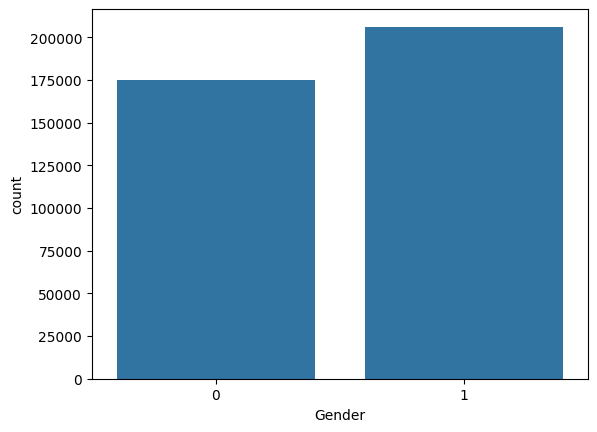

In [41]:
sns.countplot(x='Gender', data=data)
plt.show()


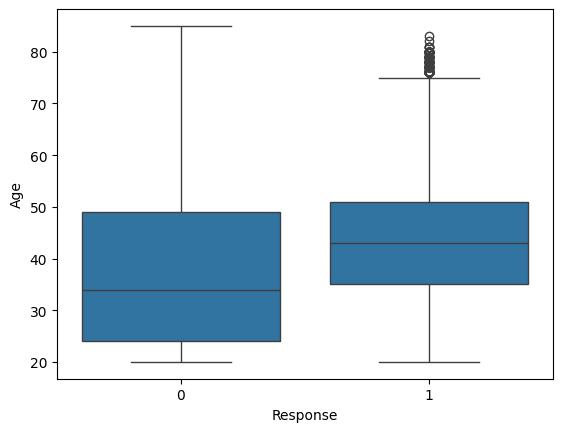

In [42]:
# Response vs Age
sns.boxplot(x='Response', y='Age', data=data)
plt.show()

In [43]:
# Pairplot for numerical features
#sns.pairplot(data, hue='Response')
#plt.show()

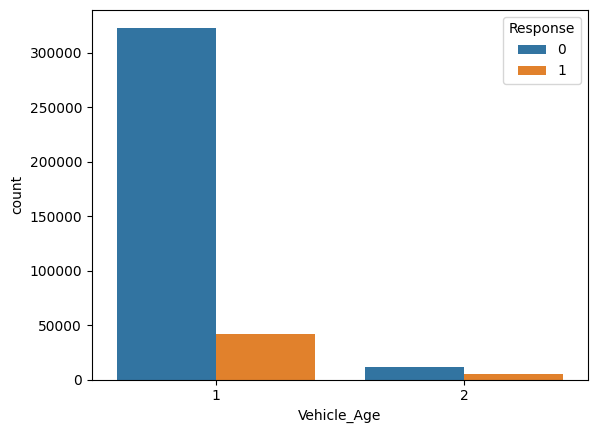

In [44]:
# Analyze Vehicle_Age with Response
sns.countplot(x='Vehicle_Age', hue='Response', data=data)
plt.show()

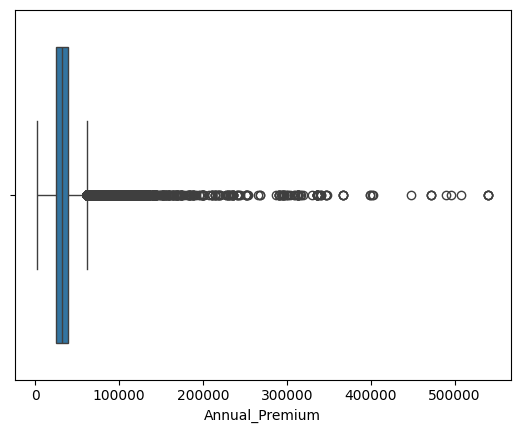

In [45]:
# Example: Boxplot for Annual_Premium
sns.boxplot(x=data['Annual_Premium'])
plt.show()

# Step 5:  Feature Engineering

In [46]:
# Driving experience as a proxy
data['Driving_Experience'] = data['Age'] * data['Driving_License']
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded,Driving_Experience
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,44
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0,76
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,47
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0,21
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,0,29


In [47]:
# Vehicle risk factor
data['Vehicle_Risk'] = data['Previously_Insured'] * data['Vehicle_Damage']
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded,Driving_Experience,Vehicle_Risk
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,44,0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0,76,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,47,0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0,21,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,0,29,0


In [48]:
data['Loyalty_Score'] = data['Vintage'] * (1 - data['Previously_Insured'])
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded,Driving_Experience,Vehicle_Risk,Loyalty_Score
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,44,0,217
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0,76,0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,47,0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0,21,0,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,0,29,0,0


In [49]:
data['Premium_Per_Year'] = data['Annual_Premium'] / data['Age']
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded,Driving_Experience,Vehicle_Risk,Loyalty_Score,Premium_Per_Year
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,44,0,217,919.409091
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0,76,0,183,441.263158
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,47,0,27,814.765957
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0,21,0,0,1362.809524
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,0,29,0,0,948.137931


In [50]:
# Age binning
#data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])
#data.head()

In [51]:
region_premium_avg = data.groupby('Region_Code')['Annual_Premium'].transform('mean')
data['Region_Avg_Premium'] = region_premium_avg
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_encoded,Driving_Experience,Vehicle_Risk,Loyalty_Score,Premium_Per_Year,Region_Avg_Premium
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,44,0,217,919.409091,38668.865245
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0,76,0,183,441.263158,24524.480813
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,47,0,27,814.765957,38668.865245
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0,21,0,0,1362.809524,27607.283146
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,0,29,0,0,948.137931,30949.127471


In [52]:
data.to_csv('enhanced_data.csv', index=False)

# Step 6:  Model Selection

# 1. Data Preparation

In [53]:
X = data.drop('Response', axis=1)
y = data['Response']

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2. Logistic Regresson

In [56]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


### 2. Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8786308414893338


In [64]:
X = data.drop("Response", axis=1)
y = data["Response"]

In [65]:
y_encoded = pd.factorize(y)[0]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pread = clf.predict(X_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [70]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
rf_y_pred = rf_clf.predict(X_test)

In [72]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.87
Precision: 0.82
Recall: 0.87
F1 Score: 0.83


In [73]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [74]:
gb_y_pred = gb_clf.predict(X_test)

In [75]:
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.88
Precision: 0.83
Recall: 0.88
F1 Score: 0.82
